In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. DATA LOADING & PREPROCESSING

In [2]:
df=pd.read_csv('fear_greed_index.csv')

In [3]:
df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [32]:
df.isnull().sum()*1

timestamp          0
value              0
classification     0
date               0
year               0
month              0
quarter            0
day_of_week        0
month_name         0
MA_7               6
MA_30             29
MA_90             89
volatility        29
dtype: int64

In [4]:
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [5]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 12
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [6]:

# Date column को datetime मध्ये convert करूया
df['date'] = pd.to_datetime(df['date'])

In [7]:
# Additional columns add करूया analysis साठी
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter
df['day_of_week'] = df['date'].dt.day_name()
df['month_name'] = df['date'].dt.month_name()

In [9]:
# Data को date के अनुसार sort करूया
df_date = df.sort_values('date').reset_index(drop=True)


In [10]:
df_date

,timestamp,value,classification,date,year,month,quarter,day_of_week,month_name
0,1517463000,30,Fear,2018-02-01,2018,2,1,Thursday,February
1,1517549400,15,Extreme Fear,2018-02-02,2018,2,1,Friday,February
2,1517635800,40,Fear,2018-02-03,2018,2,1,Saturday,February
3,1517722200,24,Extreme Fear,2018-02-04,2018,2,1,Sunday,February
4,1517808600,11,Extreme Fear,2018-02-05,2018,2,1,Monday,February
...,...,...,...,...,...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28,2025,4,2,Monday,April
2640,1745904600,60,Greed,2025-04-29,2025,4,2,Tuesday,April
2641,1745991000,56,Greed,2025-04-30,2025,4,2,Wednesday,April
2642,1746077400,53,Neutral,2025-05-01,2025,5,2,Thursday,May


In [11]:
# Moving averages calculate करूया
df['MA_7'] = df['value'].rolling(window=7).mean()
df['MA_30'] = df['value'].rolling(window=30).mean()
df['MA_90'] = df['value'].rolling(window=90).mean()

print("Dataset Overview:")
print(f"Total Records: {len(df):,}")
print(f"Date Range: {df['date'].min().date()} to {df['date'].max().date()}")
print(f"Average Fear & Greed Value: {df['value'].mean():.2f}")


Dataset Overview:
Total Records: 2,644
Date Range: 2018-02-01 to 2025-05-02
Average Fear & Greed Value: 46.98


# 2. BASIC STATISTICS

In [ ]:
 
# =============================================================================

print("\n" + "="*50)
print("CLASSIFICATION DISTRIBUTION")
print("="*50)
classification_counts = df['classification'].value_counts()
for classification, count in classification_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{classification}: {count} days ({percentage:.1f}%)")


 # 3. VISUALIZATION 1: Time Series Plot



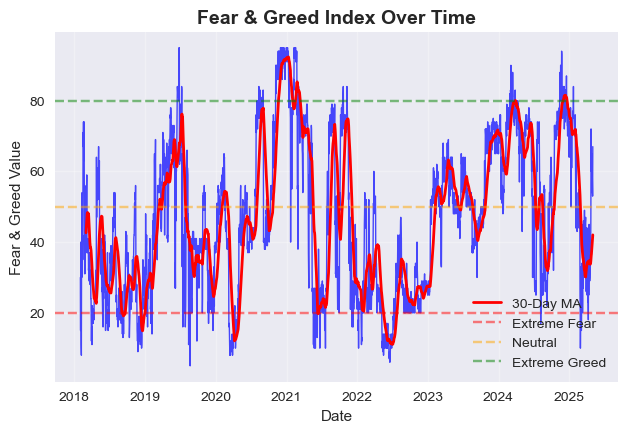

In [13]:

plt.figure(figsize=(16, 10))

# Main time series plot
plt.subplot(2, 2, 1)
plt.plot(df['date'], df['value'], linewidth=1, alpha=0.7, color='blue')
plt.plot(df['date'], df['MA_30'], linewidth=2, color='red', label='30-Day MA')
plt.axhline(y=20, color='red', linestyle='--', alpha=0.5, label='Extreme Fear')
plt.axhline(y=50, color='orange', linestyle='--', alpha=0.5, label='Neutral')
plt.axhline(y=80, color='green', linestyle='--', alpha=0.5, label='Extreme Greed')
plt.title('Fear & Greed Index Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Fear & Greed Value')
plt.legend()
plt.grid(True, alpha=0.3)

(array([2016., 2018., 2020., 2022., 2024., 2026.]),
 [Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018'),
  Text(2020.0, 0, '2020'),
  Text(2022.0, 0, '2022'),
  Text(2024.0, 0, '2024'),
  Text(2026.0, 0, '2026')])

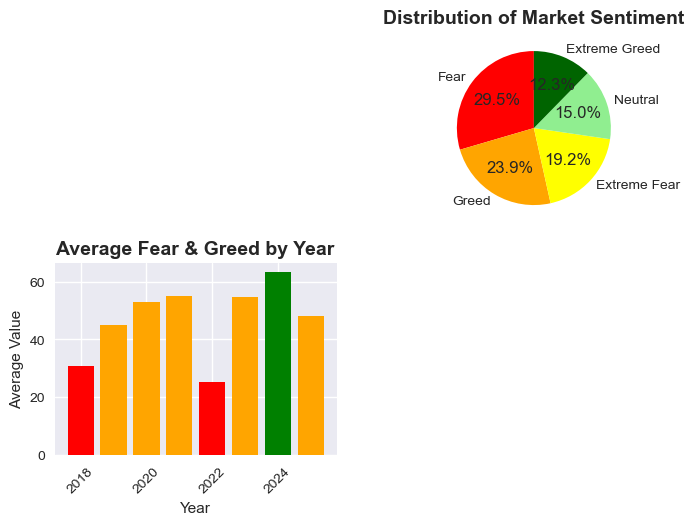

In [14]:
# Classification distribution pie chart
plt.subplot(2, 2, 2)
colors = ['red', 'orange', 'yellow', 'lightgreen', 'darkgreen']
wedges, texts, autotexts = plt.pie(classification_counts.values, 
                                   labels=classification_counts.index,
                                   autopct='%1.1f%%', 
                                   colors=colors,
                                   startangle=90)
plt.title('Distribution of Market Sentiment', fontsize=14, fontweight='bold')

# Yearly average values
plt.subplot(2, 2, 3)
yearly_avg = df.groupby('year')['value'].mean()
bars = plt.bar(yearly_avg.index, yearly_avg.values, 
               color=['red' if val < 40 else 'green' if val > 60 else 'orange' 
                      for val in yearly_avg.values])
plt.title('Average Fear & Greed by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.xticks(rotation=45)

# 4. VISUALIZATION 2: Detailed Analysis Charts

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Extreme Fear'),
  Text(1, 0, 'Fear'),
  Text(2, 0, 'Neutral'),
  Text(3, 0, 'Greed'),
  Text(4, 0, 'Extreme Greed')])

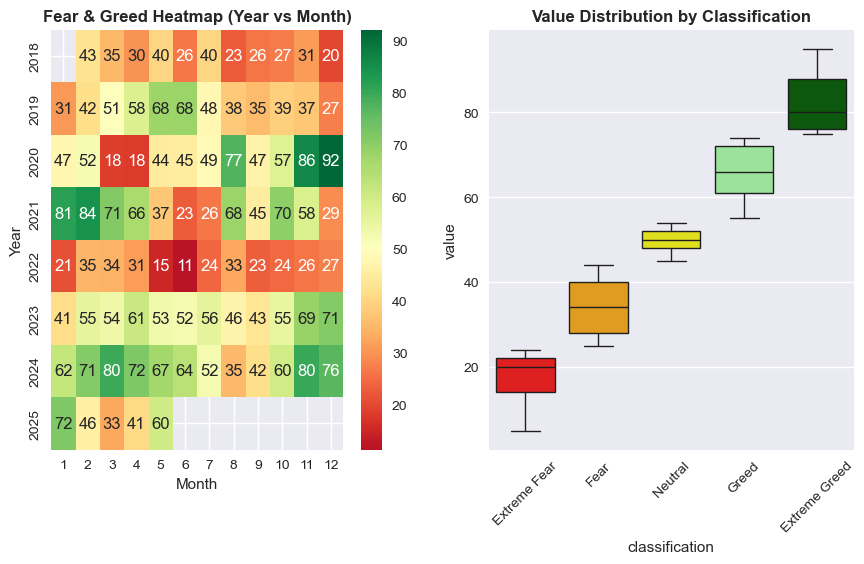

In [16]:

# =============================================================================

plt.figure(figsize=(16, 12))

# Heatmap of monthly values by year
plt.subplot(2, 3, 1)
pivot_data = df.pivot_table(values='value', index='year', columns='month', aggfunc='mean')
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='RdYlGn', center=50)
plt.title('Fear & Greed Heatmap (Year vs Month)', fontsize=12, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Year')

# Box plot by classification
plt.subplot(2, 3, 2)
classification_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
df_ordered = df.copy()
df_ordered['classification'] = pd.Categorical(df_ordered['classification'], 
                                             categories=classification_order, 
                                             ordered=True)
sns.boxplot(data=df_ordered, x='classification', y='value', 
            palette=['red', 'orange', 'yellow', 'lightgreen', 'darkgreen'])
plt.title('Value Distribution by Classification', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

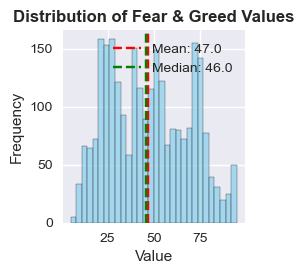

In [17]:
# Histogram of values
plt.subplot(2, 3, 3)
plt.hist(df['value'], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.axvline(df['value'].mean(), color='red', linestyle='--', 
            label=f'Mean: {df["value"].mean():.1f}')
plt.axvline(df['value'].median(), color='green', linestyle='--', 
            label=f'Median: {df["value"].median():.1f}')
plt.title('Distribution of Fear & Greed Values', fontsize=12, fontweight='bold')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

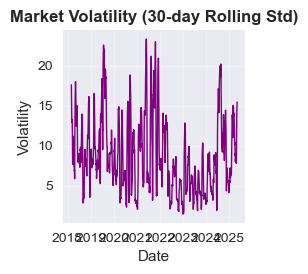

In [18]:
# Volatility over time (30-day rolling std)
plt.subplot(2, 3, 4)
df['volatility'] = df['value'].rolling(window=30).std()
plt.plot(df['date'], df['volatility'], color='purple', linewidth=1)
plt.title('Market Volatility (30-day Rolling Std)', fontsize=12, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True, alpha=0.3)

([<matplotlib.axis.XTick at 0x1a883ae3470>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

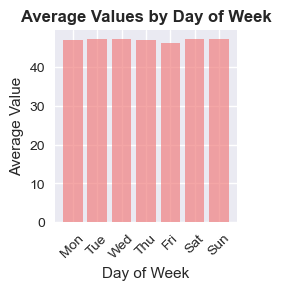

In [19]:
# Day of week analysis
plt.subplot(2, 3, 5)
dow_avg = df.groupby('day_of_week')['value'].mean()
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_avg = dow_avg.reindex(dow_order)
bars = plt.bar(range(len(dow_avg)), dow_avg.values, 
               color='lightcoral', alpha=0.7)
plt.title('Average Values by Day of Week', fontsize=12, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Average Value')
plt.xticks(range(len(dow_avg)), [d[:3] for d in dow_avg.index], rotation=45)


# 5. VISUALIZATION 3: Advanced Analytics

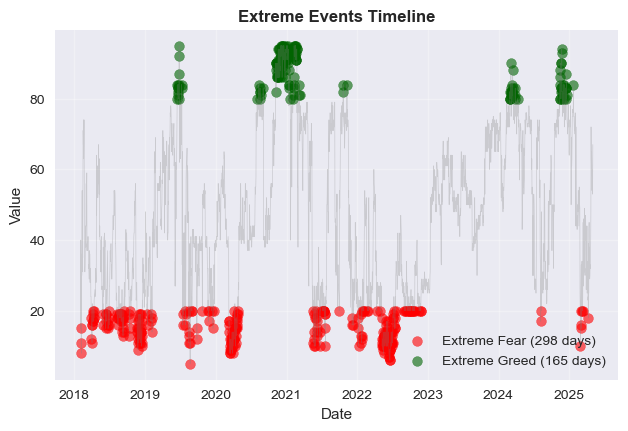

In [21]:

# =============================================================================

plt.figure(figsize=(16, 10))

# Extreme events timeline
plt.subplot(2, 2, 1)
extreme_fear = df[df['value'] <= 20]
extreme_greed = df[df['value'] >= 80]

plt.scatter(extreme_fear['date'], extreme_fear['value'], 
           color='red', alpha=0.6, s=50, label=f'Extreme Fear ({len(extreme_fear)} days)')
plt.scatter(extreme_greed['date'], extreme_greed['value'], 
           color='darkgreen', alpha=0.6, s=50, label=f'Extreme Greed ({len(extreme_greed)} days)')
plt.plot(df['date'], df['value'], color='gray', alpha=0.3, linewidth=0.5)
plt.title('Extreme Events Timeline', fontsize=12, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True, alpha=0.3)

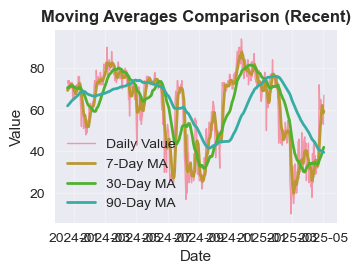

In [34]:
# Moving averages comparison
plt.subplot(2, 2, 2)
recent_data = df.tail(500)  # Last 500 days
plt.plot(recent_data['date'], recent_data['value'], 
         label='Daily Value', linewidth=1, alpha=0.7)
plt.plot(recent_data['date'], recent_data['MA_7'], 
         label='7-Day MA', linewidth=2)
plt.plot(recent_data['date'], recent_data['MA_30'], 
         label='30-Day MA', linewidth=2)
plt.plot(recent_data['date'], recent_data['MA_90'], 
         label='90-Day MA', linewidth=2)
plt.title('Moving Averages Comparison (Recent)', fontsize=12, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Value')
#plt.figure(fig=100,50)
plt.legend()
plt.grid(True, alpha=0.3)

([<matplotlib.axis.YTick at 0x1a88035a9c0>,
 [Text(0, 0, 'Fear → Fear'),
  Text(0, 1, 'Greed → Greed'),
  Text(0, 2, 'Extreme Fear → Extreme Fear'),
  Text(0, 3, 'Extreme Greed → Extreme Greed'),
  Text(0, 4, 'Neutral → Neutral'),
  Text(0, 5, 'Extreme Fear → Fear'),
  Text(0, 6, 'Fear → Extreme Fear'),
  Text(0, 7, 'Fear → Neutral')])

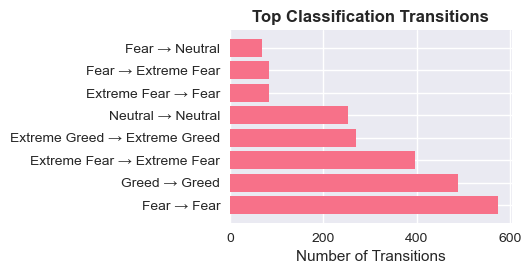

In [23]:
# Classification transitions
plt.subplot(2, 2, 3)
df_sorted = df.sort_values('date').reset_index(drop=True)
df_sorted['prev_classification'] = df_sorted['classification'].shift(1)
transitions = df_sorted.dropna()

# Count transitions
transition_counts = transitions.groupby(['prev_classification', 'classification']).size().reset_index(name='count')
top_transitions = transition_counts.nlargest(8, 'count')

bars = plt.barh(range(len(top_transitions)), top_transitions['count'])
plt.title('Top Classification Transitions', fontsize=12, fontweight='bold')
plt.xlabel('Number of Transitions')
plt.yticks(range(len(top_transitions)), 
           [f"{row['prev_classification']} → {row['classification']}" 
            for _, row in top_transitions.iterrows()])


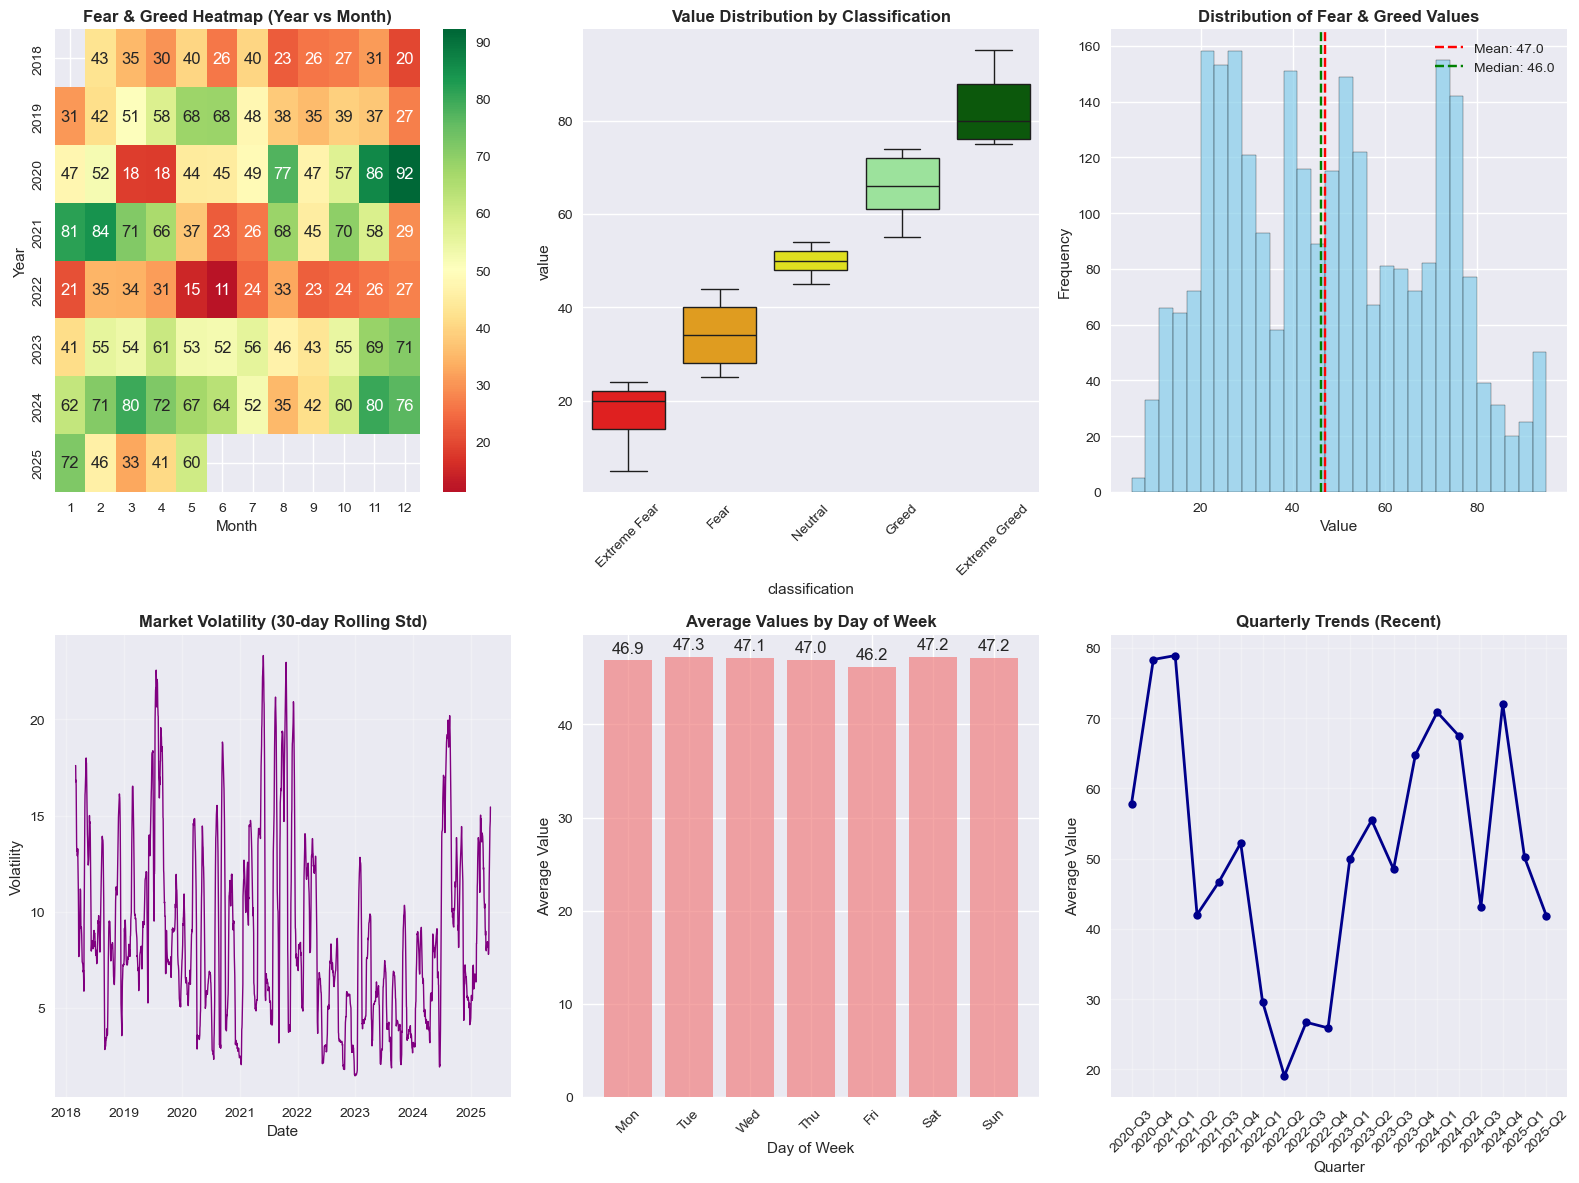

In [36]:

plt.figure(figsize=(16, 12))

# Heatmap of monthly values by year
plt.subplot(2, 3, 1)
pivot_data = df.pivot_table(values='value', index='year', columns='month', aggfunc='mean')
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='RdYlGn', center=50)
plt.title('Fear & Greed Heatmap (Year vs Month)', fontsize=12, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Year')

# Box plot by classification
plt.subplot(2, 3, 2)
classification_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
df_ordered = df.copy()
df_ordered['classification'] = pd.Categorical(df_ordered['classification'], 
                                             categories=classification_order, 
                                             ordered=True)
sns.boxplot(data=df_ordered, x='classification', y='value', 
            palette=['red', 'orange', 'yellow', 'lightgreen', 'darkgreen'])
plt.title('Value Distribution by Classification', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

# Histogram of values
plt.subplot(2, 3, 3)
plt.hist(df['value'], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.axvline(df['value'].mean(), color='red', linestyle='--', 
            label=f'Mean: {df["value"].mean():.1f}')
plt.axvline(df['value'].median(), color='green', linestyle='--', 
            label=f'Median: {df["value"].median():.1f}')
plt.title('Distribution of Fear & Greed Values', fontsize=12, fontweight='bold')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Volatility over time (30-day rolling std)
plt.subplot(2, 3, 4)
df['volatility'] = df['value'].rolling(window=30).std()
plt.plot(df['date'], df['volatility'], color='purple', linewidth=1)
plt.title('Market Volatility (30-day Rolling Std)', fontsize=12, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True, alpha=0.3)

# Day of week analysis
plt.subplot(2, 3, 5)
dow_avg = df.groupby('day_of_week')['value'].mean()
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_avg = dow_avg.reindex(dow_order)
bars = plt.bar(range(len(dow_avg)), dow_avg.values, 
               color='lightcoral', alpha=0.7)
plt.title('Average Values by Day of Week', fontsize=12, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Average Value')
plt.xticks(range(len(dow_avg)), [d[:3] for d in dow_avg.index], rotation=45)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}', ha='center', va='bottom')

# Quarterly analysis
plt.subplot(2, 3, 6)
quarterly_avg = df.groupby(['year', 'quarter'])['value'].mean().reset_index()
quarterly_avg['period'] = quarterly_avg['year'].astype(str) + '-Q' + quarterly_avg['quarter'].astype(str)
recent_quarters = quarterly_avg.tail(20)  # Last 20 quarters

plt.plot(range(len(recent_quarters)), recent_quarters['value'], 
         marker='o', linewidth=2, markersize=6, color='darkblue')
plt.title('Quarterly Trends (Recent)', fontsize=12, fontweight='bold')
plt.xlabel('Quarter')
plt.ylabel('Average Value')
plt.xticks(range(len(recent_quarters)), recent_quarters['period'], rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


print("\nMonthly Averages:")
monthly_stats = df.groupby('month_name')['value'].mean().round(2)
monthly_stats = monthly_stats.reindex(['January', 'February', 'March', 'April', 'May', 'June',
                                      'July', 'August', 'September', 'October', 'November', 'December'])
print(monthly_stats)

# 6. SUMMARY STATISTICS

In [35]:
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)

print(f"Dataset Period: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")
print(f"Total Days: {len(df):,}")
print(f"Average Value: {df['value'].mean():.2f}")
print(f"Median Value: {df['value'].median():.2f}")
print(f"Standard Deviation: {df['value'].std():.2f}")
print(f"Min Value: {df['value'].min()} ({df[df['value'] == df['value'].min()]['date'].iloc[0].strftime('%Y-%m-%d')})")
print(f"Max Value: {df['value'].max()} ({df[df['value'] == df['value'].max()]['date'].iloc[0].strftime('%Y-%m-%d')})")

print("\nExtreme Events:")
print(f"Extreme Fear Days (≤20): {len(df[df['value'] <= 20])} ({len(df[df['value'] <= 20])/len(df)*100:.1f}%)")
print(f"Extreme Greed Days (≥80): {len(df[df['value'] >= 80])} ({len(df[df['value'] >= 80])/len(df)*100:.1f}%)")

print("\nYearly Averages:")
yearly_stats = df.groupby('year')['value'].agg(['mean', 'std', 'min', 'max']).round(2)
print(yearly_stats)

print("\nMonthly Averages:")
monthly_stats = df.groupby('month_name')['value'].mean().round(2)
monthly_stats = monthly_stats.reindex(['January', 'February', 'March', 'April', 'May', 'June',
                                      'July', 'August', 'September', 'October', 'November', 'December'])
print(monthly_stats)


SUMMARY STATISTICS
Dataset Period: 2018-02-01 to 2025-05-02
Total Days: 2,644
Average Value: 46.98
Median Value: 46.00
Standard Deviation: 21.83
Min Value: 5 (2019-08-22)
Max Value: 95 (2019-06-26)

Extreme Events:
Extreme Fear Days (≤20): 298 (11.3%)
Extreme Greed Days (≥80): 165 (6.2%)

Yearly Averages:
       mean    std  min  max
year                        
2018  30.85  13.56    8   74
2019  45.12  18.14    5   95
2020  52.85  23.67    8   95
2021  54.86  25.06   10   95
2022  25.32  10.14    6   60
2023  54.70  10.97   25   75
2024  63.31  17.36   17   94
2025  47.98  18.57   10   84

Monthly Averages:
month_name
January      50.71
February     53.54
March        46.98
April        47.31
May          46.53
June         41.29
July         42.15
August       45.83
September    37.38
October      47.29
November     55.28
December     48.95
Name: value, dtype: float64


# 7. EXPORT RESULTS

In [29]:
# Create summary DataFrame for export
summary_df = pd.DataFrame({
    'Metric': ['Total Days', 'Average Value', 'Median Value', 'Std Dev', 'Min Value', 'Max Value',
               'Extreme Fear Days', 'Extreme Greed Days', 'Most Common Classification'],
    'Value': [len(df), 
              f"{df['value'].mean():.2f}",
              f"{df['value'].median():.2f}",
              f"{df['value'].std():.2f}",
              df['value'].min(),
              df['value'].max(),
              len(df[df['value'] <= 20]),
              len(df[df['value'] >= 80]),
              df['classification'].mode()[0]]
})

# Save summary to CSV
summary_df.to_csv('fear_greed_summary.csv', index=False)
print("\nSummary exported to 'fear_greed_summary.csv'")

print("\n" + "="*60)
print("ANALYSIS COMPLETE! All visualizations display is complete.")
print("="*60)


Summary exported to 'fear_greed_summary.csv'

ANALYSIS COMPLETE! All visualizations display is complete.
